Useful links:

Matt Parker's tweet:
https://twitter.com/standupmaths/status/956205704771244034

Awesome 3D simulation
https://twitter.com/timhuff88/status/956228115461795840
https://playground.babylonjs.com/#Y34QUL


Another 3D simulation
https://www.reddit.com/r/MattParker/comments/7sf02u/comment/dt5ygqs/?utm_source=share&utm_medium=web2x&context=3


Paper doing everything
https://artowen.su.domains/courses/306a/threesidedcoin_amstat.pdf

In [211]:
import pymunk
from pymunk import matplotlib_util
import matplotlib.pyplot as plt

def do_sim(r, h, impulse, elasticity, debug_draw = False, save_frames = False):
  # Create simulation space
  space = pymunk.Space()
  space.gravity = 0,-981

  # Create coin
  body = pymunk.Body()
  body.position = 0, 10 # Stop coin intersecting ground when it starts to rotate
  poly = pymunk.Poly.create_box(body, (r * 2, h * 2))
  poly.mass = 1
  poly.elasticity = elasticity
  poly.friction = 1
  space.add(body, poly)

  # Set up initial conditions
  body.velocity = 0,0
  body.apply_impulse_at_local_point((0, impulse), (-r, 0))

  # Create floor
  floor = pymunk.Segment(space.static_body, (-50, 0), (50, 0), 1)
  floor.friction = 0.5
  floor.elasticity = 1
  space.add(floor)

  if debug_draw:
    # Set up drawing configuration
    fig = plt.figure(figsize=(14,10))
    ax = plt.axes(xlim=(-2 * r, 2 * r), ylim=(0, 60))
    ax.set_aspect("equal")
    o = matplotlib_util.DrawOptions(ax)

  # Do simulation
  vys = [body.velocity[1]]
  thetas = [body.angle]
  i = 0
  frame = 0
  while abs(vys[-1]) > 1e-10:
    space.step(0.0005)
    i += 1
    vys.append(body.velocity[1])
    thetas.append(body.angle)
    if debug_draw and i % 10 == 0:
      space.debug_draw(o)
      if (save_frames):
        plt.savefig('anim' + "{:05d}".format(frame) + '.png')
        frame += 1

  return (vys, thetas)

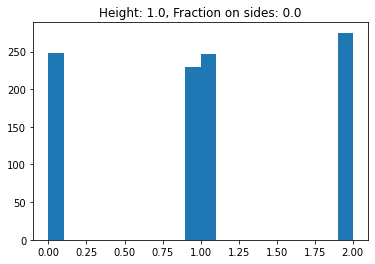

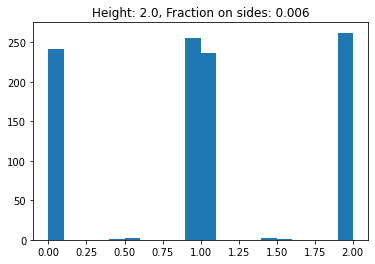

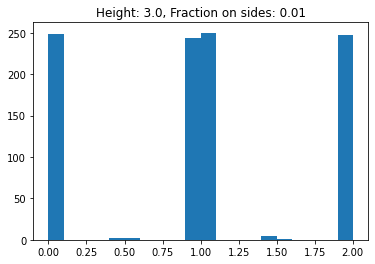

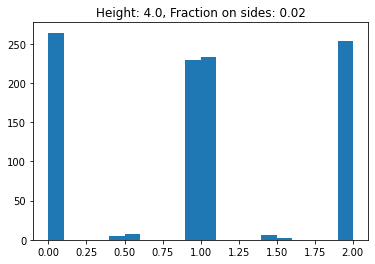

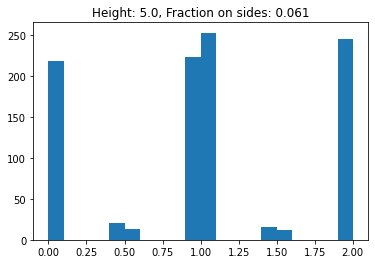

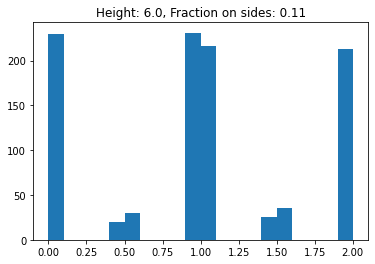

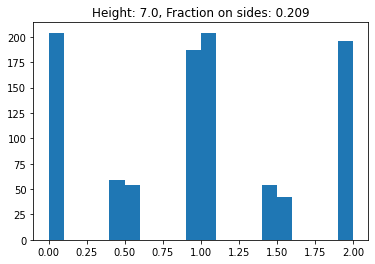

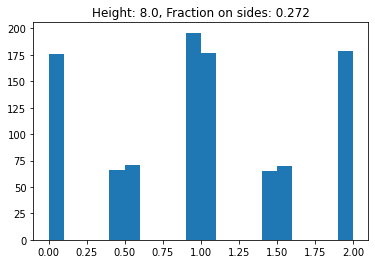

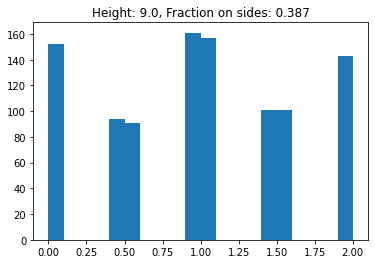

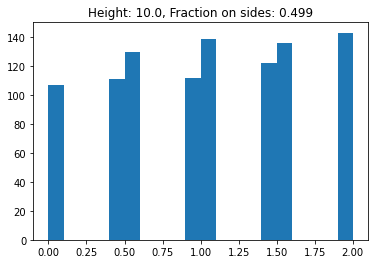

In [164]:
import numpy as np

def normalise_angle(theta):
  return theta % (2 * np.pi)

hs = np.linspace(1, 10, 10)
fracts = []

for h in hs:
  final_thetas = []

  impulses = np.random.uniform(100, 200, 1000)

  heads = 0
  tails = 0
  sides = 0

  for impulse in impulses:
    vys, thetas = do_sim(10, h, impulse, 0.95)
    final_theta = normalise_angle(thetas[-1]) / np.pi
    final_thetas.append(final_theta)

    if final_theta < 0.25 or final_theta > 1.75:
      heads += 1
    if final_theta > 0.75 and final_theta < 1.25:
      tails += 1
    if final_theta > 0.25 and final_theta < 0.75:
      sides += 1
    if final_theta > 1.25 and final_theta < 1.75:
      sides += 1

  plt.hist(final_thetas, bins=20)
  plt.title('Height: ' + str(h) + ', Fraction on sides: ' + str(sides / len(impulses)))
  plt.show()
  fracts.append(sides / len(impulses))

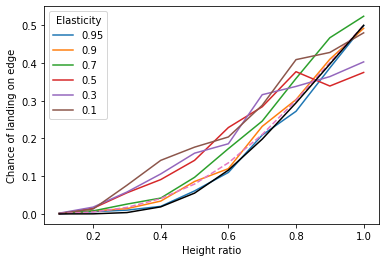

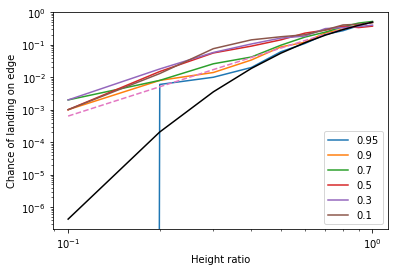

In [210]:
hs = np.linspace(1, 10, 10) / 10
model1 = 0.5 * hs ** 1.5
model2 = 0.5 * hs ** 3

# My hacky model
angle_model = 2 / np.pi * np.arctan(hs ** 3)

gamma = 0.3
l = np.sqrt(1 + hs ** 2)
paper_model= (1 - 2 / np.pi * np.arctan(1/hs)) ** (np.log((l - 1) / (l - hs)) / np.log(gamma) + 1)

plt.plot(hs, [0.0, 0.006, 0.01, 0.02, 0.061, 0.11, 0.209, 0.272, 0.387, 0.499], label='0.95')
plt.plot(hs, [0.001, 0.008, 0.014, 0.034, 0.086, 0.12, 0.232, 0.303, 0.41, 0.492], label='0.9')
plt.plot(hs, [0.002, 0.008, 0.026, 0.042, 0.097, 0.173, 0.246, 0.359, 0.467, 0.524], label='0.7')
plt.plot(hs, [0.001, 0.015, 0.056, 0.091, 0.142, 0.229, 0.284, 0.377, 0.339, 0.375], label='0.5')
plt.plot(hs, [0.002, 0.018, 0.058, 0.106, 0.161, 0.186, 0.316, 0.338, 0.364, 0.403], label='0.3')
plt.plot(hs, [0.001, 0.013, 0.076, 0.142, 0.177, 0.204, 0.288, 0.409, 0.428, 0.48], label='0.1')
# plt.plot(hs, model1, '--')
# plt.plot(hs, model2, '--')

plt.plot(hs, angle_model, '--')
plt.plot(hs, paper_model, c='black')

# plt.fill(np.concatenate([hs, np.flip(hs)]), np.concatenate([model1, np.flip(model2)]), alpha = 0.2)

plt.legend(title="Elasticity")
plt.xlabel('Height ratio')
plt.ylabel('Chance of landing on edge')
plt.show()

plt.plot(hs, [0.0, 0.006, 0.01, 0.02, 0.061, 0.11, 0.209, 0.272, 0.387, 0.499], label='0.95')
plt.plot(hs, [0.001, 0.008, 0.014, 0.034, 0.086, 0.12, 0.232, 0.303, 0.41, 0.492], label='0.9')
plt.plot(hs, [0.002, 0.008, 0.026, 0.042, 0.097, 0.173, 0.246, 0.359, 0.467, 0.524], label='0.7')
plt.plot(hs, [0.001, 0.015, 0.056, 0.091, 0.142, 0.229, 0.284, 0.377, 0.339, 0.375], label='0.5')
plt.plot(hs, [0.002, 0.018, 0.058, 0.106, 0.161, 0.186, 0.316, 0.338, 0.364, 0.403], label='0.3')
plt.plot(hs, [0.001, 0.013, 0.076, 0.142, 0.177, 0.204, 0.288, 0.409, 0.428, 0.48], label='0.1')
# plt.plot(hs, model1, '--')
# plt.plot(hs, model2, '--')

plt.plot(hs, angle_model, '--')
plt.plot(hs, paper_model, c='black')

# plt.fill(np.concatenate([hs, np.flip(hs)]), np.concatenate([model1, np.flip(model2)]), alpha = 0.2)

plt.legend()
plt.xlabel('Height ratio')
plt.ylabel('Chance of landing on edge')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [165]:
fracts

[0.0, 0.006, 0.01, 0.02, 0.061, 0.11, 0.209, 0.272, 0.387, 0.499]

In [216]:
# Find an example of landing on a side
while True:
  impulse = np.random.uniform(100, 200)
  vys, thetas = do_sim(10, 1, impulse, 0.5)
  final_theta = normalise_angle(thetas[-1]) / np.pi

  if final_theta > 0.25 and final_theta < 0.75:
    break
  if final_theta > 1.25 and final_theta < 1.75:
    break

print(impulse)

KeyboardInterrupt: 

To make the video of this animation:

../ffmpeg -framerate 30 -pattern_type sequence -i G:\Github\Blog\coin\anim%05d.png -c:v libx264 -crf 17 -pix_fmt yuv420p out.mp4

KeyboardInterrupt: 

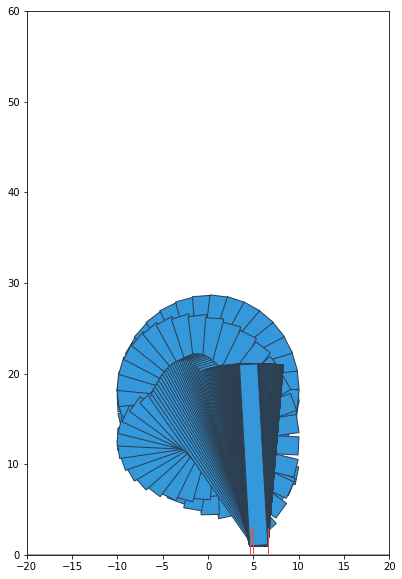

In [215]:
# vys, thetas = do_sim(10, 1, 135.86994994648205, 0.9, debug_draw=True, save_frames=True)
# vys, thetas = do_sim(10, 1, 125.70445756634282, 0.8, debug_draw=True, save_frames=True)
# vys, thetas = do_sim(10, 1, 151.1636843802419, 0.7, debug_draw=True, save_frames=True)
# vys, thetas = do_sim(10, 1, 151.1636843802419, 0.6, debug_draw=True, save_frames=True)
# vys, thetas = do_sim(10, 1, 164.33706205599736, 0.2, debug_draw=True, save_frames=True)
# vys, thetas = do_sim(10, 1, 130.19447677418208, 0.2, debug_draw=True, save_frames=True) # With friction = 0.5. Note - ends on a long lean...

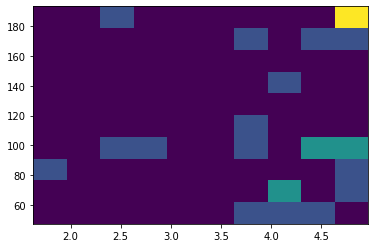

KeyboardInterrupt: 

In [144]:
from IPython.display import clear_output

impulses = []
hs = []

while True:
  h = np.random.uniform(1, 5)
  impulse = np.random.uniform(0, 200)

  vys, thetas = do_sim(10, h, impulse, 0.9)
  final_theta = normalise_angle(thetas[-1]) / np.pi

  if (final_theta > 0.25 and final_theta < 0.75) or (final_theta > 1.25 and final_theta < 1.75):
    impulses.append(impulse)
    hs.append(h)

    clear_output(wait=True)
    plt.hist2d(hs, impulses)
    plt.show()
  